In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [204]:
df_pathway_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
# 
# df_pathway_att = df_pathway_att[df_pathway_att['cell_line'].isin(['EKVX','HCC827','LCLC103H','LU135','NCIH1299','NCIH146','NCIH1963','NCIH2170','NCIH2228','NCIH526','PC14','RERFLCSQ1'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)
df_pathway_att.head()

(12630, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,5-Fluorouracil,OPM2,PCM,0.001386,0.001516,0.001544,0.001764,0.001685,0.001634,0.001773,...,0.001542,0.001352,0.001542,0.001405,0.001408,0.001708,0.002633,0.001840,0.001685,0.001541
1,5-azacytidine,OPM2,PCM,0.001537,0.001651,0.001543,0.001677,0.001742,0.001588,0.001569,...,0.001544,0.001334,0.001352,0.001402,0.001405,0.001742,0.002479,0.001702,0.002028,0.001539
2,A-366,OPM2,PCM,0.001513,0.001648,0.001529,0.001405,0.001395,0.001593,0.001573,...,0.001530,0.001300,0.001519,0.001397,0.001572,0.001718,0.002541,0.001649,0.002129,0.001347
3,ABT737,OPM2,PCM,0.001365,0.001471,0.001543,0.001316,0.001746,0.001747,0.001416,...,0.001365,0.001459,0.001541,0.001586,0.001586,0.001406,0.002330,0.001366,0.002299,0.001535
4,AGI-5198,OPM2,PCM,0.001358,0.001446,0.001532,0.001425,0.001736,0.001576,0.001592,...,0.001532,0.001436,0.001513,0.001399,0.001401,0.001737,0.002400,0.001265,0.002555,0.001530


In [205]:
# 根据drug进行分组计数
df_pathway_att.groupby('drug')['cell_line'].count()

drug
5-Fluorouracil       61
5-azacytidine        50
A-366                50
ABT737               60
AGI-5198             61
                     ..
YK-4-279             61
ZM447439             61
Zoledronate          48
alpha-lipoic acid    52
glutathione          52
Name: cell_line, Length: 233, dtype: int64

In [206]:

# 筛选出drug  = ABT737,Oxaliplatin,BMS-754807,Nutlin-3a (-),Axitinib,Navitoclax,PCI-34051,Picolinici-acid,Docetaxel,Camptothecin
df_pathway_att_top10_drug = df_pathway_att[df_pathway_att['drug'].isin(['Oxaliplatin','ABT737','BMS-754807','Nutlin-3a (-)','Axitinib','Navitoclax','Camptothecin'])]
# 重置索引
df_pathway_att_top10_drug = df_pathway_att_top10_drug.reset_index(drop=True)
print(df_pathway_att_top10_drug.shape)
df_pathway_att_top10_drug.head()

(426, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,ABT737,OPM2,PCM,0.001365,0.001471,0.001543,0.001316,0.001746,0.001747,0.001416,...,0.001365,0.001459,0.001541,0.001586,0.001586,0.001406,0.002330,0.001366,0.002299,0.001535
1,Axitinib,OPM2,PCM,0.001357,0.001579,0.001530,0.001383,0.001661,0.001576,0.001574,...,0.001531,0.001328,0.001522,0.001571,0.001400,0.001737,0.002311,0.001239,0.002520,0.001554
2,BMS-754807,OPM2,PCM,0.001361,0.001668,0.001536,0.001470,0.001744,0.001580,0.001523,...,0.001536,0.001455,0.001527,0.001403,0.001404,0.001559,0.002657,0.001445,0.002334,0.001532
3,Camptothecin,OPM2,PCM,0.001354,0.001657,0.001526,0.001253,0.001723,0.001634,0.001582,...,0.001527,0.001425,0.001517,0.001477,0.001398,0.001549,0.002598,0.001567,0.002235,0.001523
4,Navitoclax,OPM2,PCM,0.001373,0.001315,0.001554,0.001402,0.001597,0.001599,0.001610,...,0.001553,0.001488,0.001553,0.001596,0.001598,0.001595,0.002320,0.001218,0.002247,0.001528


In [207]:
# 取df_pathway_att_top10_drug前三列数据
df_pathway_att_top10_drug_OncotreeCode = df_pathway_att_top10_drug.iloc[:, :3]
# 去重
df_pathway_att_top10_drug_OncotreeCode = df_pathway_att_top10_drug_OncotreeCode.drop_duplicates()
# 重置索引
df_pathway_att_top10_drug_OncotreeCode = df_pathway_att_top10_drug_OncotreeCode.reset_index(drop=True)
print(df_pathway_att_top10_drug_OncotreeCode.shape)
df_pathway_att_top10_drug_OncotreeCode.head()

(426, 3)


,drug,cell_line,OncotreeCode
0,ABT737,OPM2,PCM
1,Axitinib,OPM2,PCM
2,BMS-754807,OPM2,PCM
3,Camptothecin,OPM2,PCM
4,Navitoclax,OPM2,PCM


In [208]:
# 对df_pathway_att_top10_drug从第四列数据开始进行PCA降维，降维成2维数据
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_pathway_att_top10_drug.iloc[:, 3:])
df_pathway_att_top10_drug_pca = pca.transform(df_pathway_att_top10_drug.iloc[:, 3:])
df_pathway_att_top10_drug_pca.shape

(426, 2)

In [209]:
# 将降维后的数据转换成dataframe
df_pathway_att_top10_drug_pca = pd.DataFrame(df_pathway_att_top10_drug_pca)
df_pathway_att_top10_drug_pca.columns = ['pca_1', 'pca_2']
df_pathway_att_top10_drug_pca.insert(0, 'drug', df_pathway_att_top10_drug['drug'])
df_pathway_att_top10_drug_pca.insert(1, 'OncotreeCode', df_pathway_att_top10_drug['OncotreeCode'])
print(df_pathway_att_top10_drug_pca.shape)
df_pathway_att_top10_drug_pca.head()

(426, 4)


,drug,OncotreeCode,pca_1,pca_2
0,ABT737,PCM,0.003110,0.000321
1,Axitinib,PCM,-0.001691,0.000024
2,BMS-754807,PCM,-0.001444,0.000693
3,Camptothecin,PCM,-0.002004,-0.000498
4,Navitoclax,PCM,0.004087,-0.000501


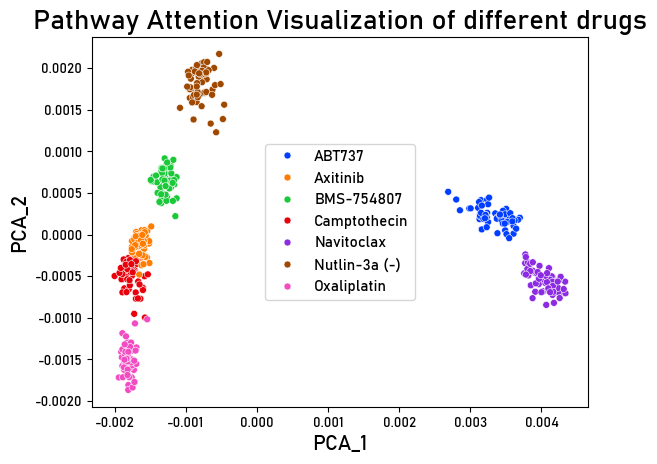

In [210]:
# 使用seaborn画图
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
# plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='drug', data=df_pathway_att_top10_drug_pca, s=25,palette='bright')
# 设置标签居中
plt.legend(loc='center', fontsize=11)


# title
plt.title('Pathway Attention Visualization of different drugs', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

plt.savefig('7_drug_pathway_attention_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

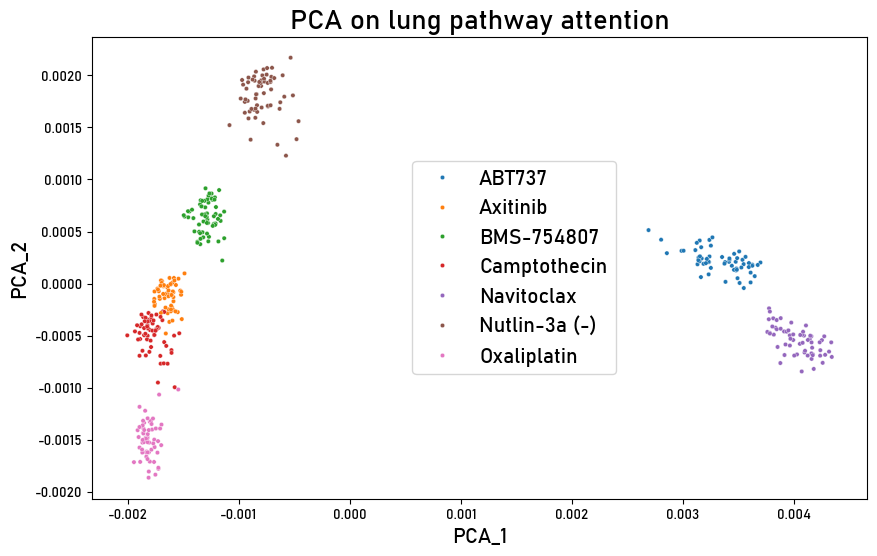

In [211]:
# 使用seaborn画图
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='drug', data=df_pathway_att_top10_drug_pca, s=10)
# title
plt.title('PCA on lung pathway attention', fontsize=20)
# 设置标签居中
plt.legend(loc='center left', bbox_to_anchor=(0.4, 0.5), ncol=1, fontsize=15)
# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_top10_drug_seaborn.png', dpi=300, bbox_inches='tight')

plt.show()


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       PCM
1       PCM
2       PCM
3       PCM
4       PCM
       ... 
421    SCLC
422    SCLC
423    SCLC
424    SCLC
425    SCLC
Name: OncotreeCode, Length: 426, dtype: object

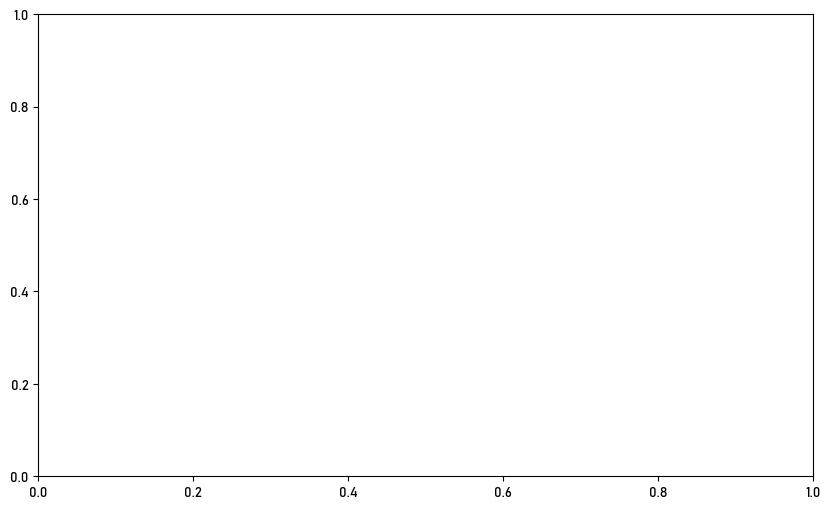

In [212]:
# 画出散点图，根据drug进行着色
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x=df_pathway_att_top10_drug_pca['pca_1'], y=df_pathway_att_top10_drug_pca['pca_2'], c=df_pathway_att_top10_drug_pca['OncotreeCode'], s=3)
# Get the current axes, creating one if necessary.
ax = plt.gca()
# Set the spines (the box) visibility
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
# ax.spines['left'].set_linewidth(1)  # Y轴线宽
# ax.spines['bottom'].set_linewidth(1)

# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_top10_drug.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# 将df_LUNG根据cell_line分组，再取每组drug列的交集
df_pathway_att_drug = df_pathway_att.groupby('cell_line')['drug'].apply(set).reset_index()
# 将df_LUNG_drug中的drug取交集
drugs = set.intersection(*df_pathway_att_drug['drug'])
print(len(drugs))
# 取df_LUNG中drug中在drugs中的数据
df_pathway_att = df_pathway_att[df_pathway_att['drug'].isin(drugs)]
# TODO:去掉drug = ABT737,AZD5582,Dactinomycin,Docetaxel,GSK1904529A,Navitoclax,Paclitaxel,Sabutoclax,Venetoclax
df_pathway_att = df_pathway_att[~df_pathway_att['drug'].isin(['ABT737','AZD5582','Dactinomycin','Docetaxel','GSK1904529A','Navitoclax','Paclitaxel','Sabutoclax','Venetoclax'])]
# 重置索引
df_pathway_att = df_pathway_att.reset_index(drop=True)
print(df_pathway_att.shape)

In [ ]:
# 取df_pathway_att前三列数据
df_pathway_att_OncotreeCode = df_pathway_att.iloc[:, :3]
# 去掉第一列数据
# df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop(['drug'], axis=1)
# 去重
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.drop_duplicates()
# 重置索引
df_pathway_att_OncotreeCode = df_pathway_att_OncotreeCode.reset_index(drop=True)
print(df_pathway_att_OncotreeCode.shape)
df_pathway_att_OncotreeCode.head()

In [ ]:
# 对df_pathway_att从第四列数据开始进行PCA降维，降维成2维数据
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca = pca.transform(df_pathway_att.iloc[:, 3:])
df_pathway_att_pca.shape

In [ ]:
# 将降维后的数据转换成dataframe
df_pathway_att_pca = pd.DataFrame(df_pathway_att_pca)
df_pathway_att_pca.columns = ['pca_1', 'pca_2']
df_pathway_att_pca.insert(0, 'cell_line', df_pathway_att['cell_line'])
df_pathway_att_pca.insert(1, 'OncotreeCode', df_pathway_att['OncotreeCode'])
# 将pca_1>0.002的数据标注出来，方便后面的数据分析
df_pathway_att_pca['pca_1>0.002'] = df_pathway_att_pca['pca_1'].apply(lambda x: 1 if x>0.002 else 0)
print(df_pathway_att_pca.shape)
df_pathway_att_pca.head()

In [ ]:
# 将df_pathway_att_pca与df_pathway_att_OncotreeCode合并,按照index
# df_pathway_att_pca = pd.concat([df_pathway_att_pca, df_pathway_att_OncotreeCode], axis=1)
# print(df_pathway_att_pca.shape)
# df_pathway_att_pca.head()

In [ ]:
# 设置颜色
# ['#984EA3','#FF7F00','#E41A1C','#4DAF4A','#377EB8']
# 设置颜色方案
palette = {'LUAD':'#984EA3', 
           'LCLC':'#FF7F00', 
           'NSCLC':'#4DAF4A',
           'LUSC':'#377EB8',
           'SCLC':'#E41A1C'}
# palette = {'LUAD':'#b9f2f0', 
#            'LCLC':'#d0bbff', 
#            'NSCLC':'#ff9f9b',
#            'LUSC':'#a6d854',
#            'SCLC':'#66c2a5'}
# 将df_pathway_att_pca的OncotreeCode列的值替换成颜色
df_pathway_att_pca['OncotreeCode'] = df_pathway_att_pca['OncotreeCode'].map(palette)

In [ ]:
# 画出散点图，按照OncotreeCode进行着色
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.scatter(x=df_pathway_att_pca['pca_1'], y=df_pathway_att_pca['pca_2'], c=df_pathway_att_pca['OncotreeCode'], s=3)
# Get the current axes, creating one if necessary.
ax = plt.gca()
# Set the spines (the box) visibility
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
# ax.spines['left'].set_linewidth(1)  # Y轴线宽
# ax.spines['bottom'].set_linewidth(1)

# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

plt.savefig('LUNG_pathway_attention_PCA.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# 使用seaborn画图
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='OncotreeCode', data=df_pathway_att_pca, s=10)
# title
plt.title('PCA on lung pathway attention', fontsize=20)

# X轴：PCA1
plt.xlabel('PCA_1', fontsize=15)
# Y轴：PCA2
plt.ylabel('PCA_2', fontsize=15)

# plt.savefig('LUNG_pathway_attention_PCA_seaborn.png', dpi=300, bbox_inches='tight')

plt.show()